### Analyse data Titanic Disaster

### Model: Multiple Linear Regression

In [1]:
# setup absolute path to location of package Starts and config-file 
from inspect import getsourcefile
import os.path as path, sys
current_dir = path.dirname(path.abspath(getsourcefile(lambda:0)))
sys.path.insert(0, current_dir[:current_dir.rfind(path.sep)])

# import package Starts
from Starts.startmodskl import *

local_kwargs {'data_path': './data/train.csv, ./data/titanic_no_nan.csv ,./data/test.csv', 'drop_obj_col': False, 'nan_drop_col': False, 'nan_drop_row': False, 'nan_zero': False, 'nan_mean': True, 'nan_mean_neighbors': False}


In [2]:
nonan_data = idata[1]
nonan_data.head()

,Survived,Pclass,Sex,Age,Ticket,Fare,Title,FamilySize
0,0,3,1,29.699118,199,7.2292,5,0
1,1,3,0,0.750000,194,19.2583,4,3
2,0,3,1,29.699118,487,6.8583,5,0
3,1,1,1,36.000000,33,120.0000,5,3
4,0,2,1,29.699118,629,15.0500,5,0


In [3]:
# proceed feature_selection to choose and keep the features which have the most impact and remove the unnecessary data
nonan_data = StartMod.feature_selection(nonan_data, ['Pclass', 'Ticket', 'Fare', 'Sex'], 
                                        dependent_label='Survived', rm=False)

Index(['Survived', 'Pclass', 'Sex', 'Age', 'Ticket', 'Fare', 'Title',
       'FamilySize'],
      dtype='object')

RSquared:  0.535254435113

Adj_RSquared:  0.531574323174

                             OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.535
Model:                            OLS   Adj. R-squared:                  0.532
Method:                 Least Squares   F-statistic:                     145.4
Date:                Sat, 28 Jul 2018   Prob (F-statistic):          2.13e-142
Time:                        13:44:06   Log-Likelihood:                -496.32
No. Observations:                 891   AIC:                             1007.
Df Residuals:                     884   BIC:                             1040.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err    

#### Since we attempt to keep R_Squared close as 1 as possible. By removing features 'Ticket', 'Pclass', R_Squared are not nearly changed but removing the features 'Fare' and 'Sex', R_Squared decreased strongly. So we decide to remove the features 'Ticket' and 'Pclass' because these features have very small impact on dataset and also reduce the unnecessary data processing

In [4]:
func = lambda col: nonan_data.drop(col, axis=1)
nonan_data = func(['Pclass', 'Ticket'])
nonan_data.head()

,Survived,Sex,Age,Fare,Title,FamilySize
0,0,1,29.699118,7.2292,5,0
1,1,0,0.750000,19.2583,4,3
2,0,1,29.699118,6.8583,5,0
3,1,1,36.000000,120.0000,5,3
4,0,1,29.699118,15.0500,5,0


x_value is optimal with p_value:  0.0456494393379

R_Squared:  0.346316387837

Adjusted_R_Squared:  0.342623260084

Summary:                              OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.346
Model:                            OLS   Adj. R-squared:                  0.343
Method:                 Least Squares   F-statistic:                     93.77
Date:                Sat, 28 Jul 2018   Prob (F-statistic):           2.88e-79
Time:                        13:44:06   Log-Likelihood:                -432.57
No. Observations:                 891   AIC:                             877.1
Df Residuals:                     885   BIC:                             905.9
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-----

/usr/lib64/python3.6/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


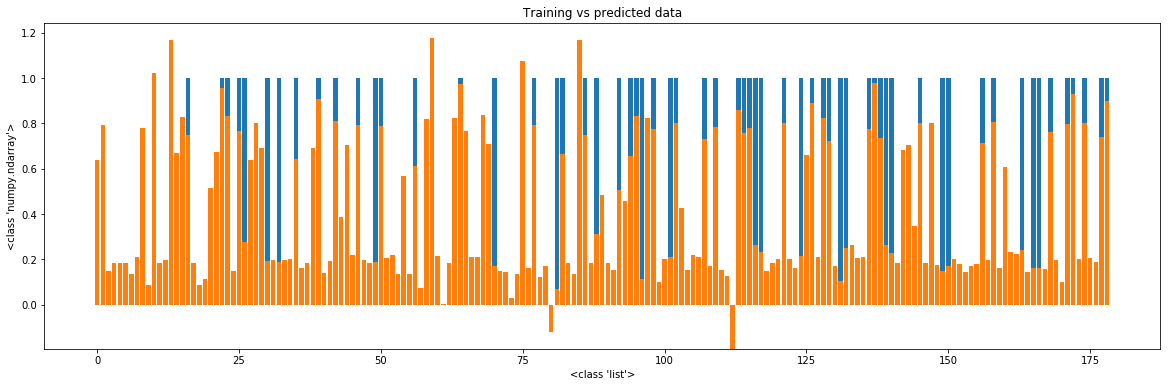

In [5]:
regressor, y_true, y_pred = StartModSKL.regression_multi_linear(nonan_data, dependent_label='Survived',vis=True)

In [6]:
(y_pred > 1).any(), (y_pred < 0).any()

(True, True)

In [7]:
# Since this is regression model, we expect to have many numeric values.
# Convert the predicted value by rounding it (>0.5 will be considered as 1 else 0)
y_pred = np.array([1 if item > 0.5 else 0 for item in y_pred ])
len(y_true), len(y_pred)

(179, 179)

In [8]:
StartMod.metrics_report(y_true, y_pred)

Classification Report: 
              precision    recall  f1-score   support

          0       0.81      0.79      0.80       113
          1       0.65      0.68      0.67        66

avg / total       0.75      0.75      0.75       179

Confusion Matrix: 
 [[89 24]
 [21 45]]

Mean_Squared_Error: 
 0.251396648045

Accuracy Score: 
 0.748603351955
binary

Precision Score: 
 0.652173913043

Recall Score: 
 0.681818181818

F-Score: 
 0.666666666667


### Result: 
#### the correct predicted result 134, 
#### the wrong predicted result 45